# Importing necessary libraries

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset

In [19]:
financialdata = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

print(financialdata.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


#Data Preprocessing

#Handling missing values

In [20]:
missing_values = financialdata.isnull().sum()
financialdata.fillna(0, inplace=True)

# Encoding categorical features

In [39]:
columns_to_drop = ['nameOrig', 'nameDest']
financialdata_cleaned = financialdata.drop(columns=columns_to_drop, axis=1)
label_encoder = LabelEncoder()
for column in financialdata_cleaned.select_dtypes(include=['object']).columns:
    financialdata_cleaned[column] = label_encoder.fit_transform(financialdata_cleaned[column])

# Separating features and target variable

In [27]:
X = financialdata_cleaned.drop('isFraud', axis=1)
y = financialdata_cleaned['isFraud']

# Handling class imbalance using SMOTE

In [26]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("SMOTE applied successfully!")
print("Original dataset shape:", X.shape)
print("Resampled dataset shape:", X_resampled.shape)

SMOTE applied successfully!
Original dataset shape: (6362620, 8)
Resampled dataset shape: (12708814, 8)


In [51]:
preprocessed_data = pd.DataFrame(X_train, columns=X.columns)
preprocessed_data['isFraud'] = y_resampled
preprocessed_data.to_csv('preprocessed_financial_data.csv', index=False)
print("Preprocessed data has been saved as 'preprocessed_financial_data.csv'.")

Preprocessed data has been saved as 'preprocessed_financial_data.csv'.


# Splitting data into train and test sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature scaling

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Training the Logistic Regression Model

#Initializing & Training the model

In [33]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

#Making predictions

In [34]:
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

#Model Evaluation

#Classification Report

In [40]:
print("\nClassification Report of Logistic Regression:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94   1270837
           1       0.97      0.90      0.93   1270926

    accuracy                           0.94   2541763
   macro avg       0.94      0.94      0.94   2541763
weighted avg       0.94      0.94      0.94   2541763


Accuracy: 0.9353499913249189

AUC-ROC Score: 0.9835521496209195


#Confusion matrix

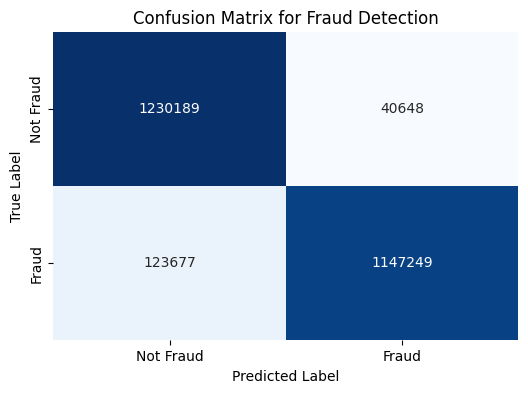

In [42]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for Fraud Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve

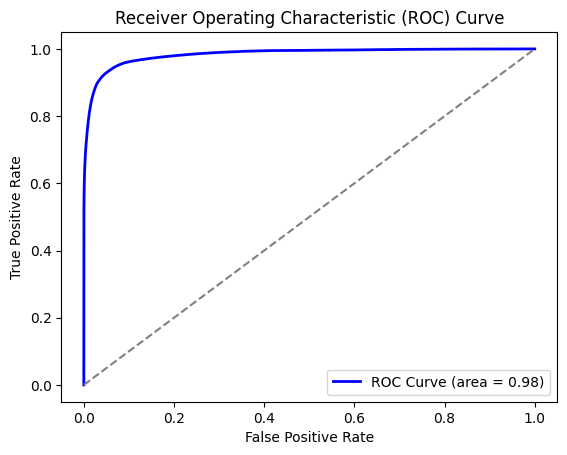

In [47]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Saving results and metrics to CSV

In [56]:
classification_rep = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})


classification_report_df = pd.DataFrame(classification_rep).transpose()

cm_df = pd.DataFrame(cm, columns=['Predicted Not Fraud', 'Predicted Fraud'], index=['Actual Not Fraud', 'Actual Fraud'])

metrics = {
    'Accuracy': [accuracy],
    'AUC-ROC': [roc_auc]
}
metrics_df = pd.DataFrame(metrics)

results.to_csv('model_predictions.csv', index=False)
classification_report_df.to_csv('classification_report.csv', index=True)
cm_df.to_csv('confusion_matrix.csv', index=True)
metrics_df.to_csv('model_metrics.csv', index=False)

print("Model results saved successfully.")

Model results saved successfully.
